Nous travaillons avec la version 6.0.3 du Notebook Jupyter en langage R version 3.4.1 (2017-06-30).

# Sujet 6 : Autour du Paradoxe de Simpson
## Importation des données
Dans un premier temps nous prenons les données en ligne. Puis je ferais une copie comme dans l'exo pour être sûre que le fichier soit toujours accessible.

In [4]:
# Set the working directory (optional if file is not in the working directory)
data <- read.csv("https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false")

# Display the first few rows of the data
head(data)

Smoker Status Age 
1 Yes    Alive  21.0
2 Yes    Alive  19.3
3 No     Dead   57.5
4 No     Alive  47.1
5 Yes    Alive  81.4
6 No     Alive  36.8

In [ ]:
data_file = "syndrome-grippal.csv"
if (!file.exists(data_file))
    download.file(data_url, data_file, method="auto")

## Analyse rapide des données

In [6]:
summary(data)
str(data)

 Smoker      Status         Age       
 No :732   Alive:945   Min.   :18.00  
 Yes:582   Dead :369   1st Qu.:31.30  
                       Median :44.80  
                       Mean   :47.36  
                       3rd Qu.:60.60  
                       Max.   :89.90  

'data.frame':	1314 obs. of  3 variables:
 $ Smoker: Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 2 2 2 ...
 $ Status: Factor w/ 2 levels "Alive","Dead": 1 1 2 1 1 1 1 2 1 1 ...
 $ Age   : num  21 19.3 57.5 47.1 81.4 36.8 23.8 57.5 24.8 49.5 ...


### 1. Analyse de l'effectif et de la mortalité

In [26]:
analyse <- table(data$Smoker,data$Status)
analyse
analyse_data <- as.data.frame(analyse)
print(analyse_data)

     
      Alive Dead
  No    502  230
  Yes   443  139

  Var1  Var2 Freq
1   No Alive  502
2  Yes Alive  443
3   No  Dead  230
4  Yes  Dead  139


In [49]:
analyse_data$mortality <- ifelse(analyse_data$Var1=='No', analyse_data$Freq/(analyse_data$Freq[1]+analyse_data$Freq[3]), analyse_data$Freq/(analyse_data$Freq[2]+analyse_data$Freq[4]))
analyse_data
analyse_data_2 <- analyse_data[analyse_data$Var2=="Dead",]
analyse_data_2

Var1 Var2  Freq mortality
1 No   Alive 502  0.6857923
2 Yes  Alive 443  0.7611684
3 No   Dead  230  0.3142077
4 Yes  Dead  139  0.2388316

Var1 Var2 Freq mortality
3 No   Dead 230  0.3142077
4 Yes  Dead 139  0.2388316

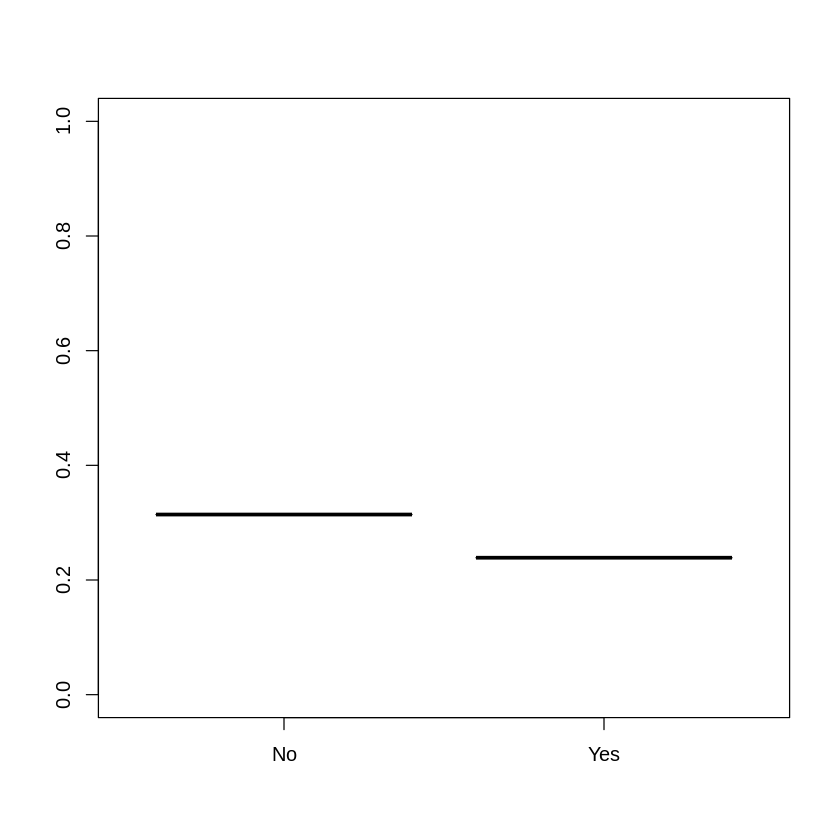

In [55]:
plot(x=analyse_data_2$Var1, y=analyse_data_2$mortality, ylim=c(0,1))

Il semble y a voir peu de différence de mortalité entre les fumeuses et les non fumeuses.

### 2. Analyse de l'effectif et de la mortalité par groupe d'âge

In [65]:
data$AgeGroup <- ifelse(data$Age<34, '18-34 ans', ifelse(data$Age<54, '34-54 ans', ifelse(data$Age<64, '54-64 ans', 'plus de 65 ans')))   
age <- table(data$Smoker,data$Status, data$AgeGroup)
age
age_data <- as.data.frame(age)
print(age_data)

, ,  = 18-34 ans

     
      Alive Dead
  No    213    6
  Yes   174    5

, ,  = 34-54 ans

     
      Alive Dead
  No    180   19
  Yes   198   41

, ,  = 54-64 ans

     
      Alive Dead
  No     80   39
  Yes    64   51

, ,  = plus de 65 ans

     
      Alive Dead
  No     29  166
  Yes     7   42


   Var1  Var2           Var3 Freq
1    No Alive      18-34 ans  213
2   Yes Alive      18-34 ans  174
3    No  Dead      18-34 ans    6
4   Yes  Dead      18-34 ans    5
5    No Alive      34-54 ans  180
6   Yes Alive      34-54 ans  198
7    No  Dead      34-54 ans   19
8   Yes  Dead      34-54 ans   41
9    No Alive      54-64 ans   80
10  Yes Alive      54-64 ans   64
11   No  Dead      54-64 ans   39
12  Yes  Dead      54-64 ans   51
13   No Alive plus de 65 ans   29
14  Yes Alive plus de 65 ans    7
15   No  Dead plus de 65 ans  166
16  Yes  Dead plus de 65 ans   42


Nous pouvons voir que plus les personnes sont âgées, plus il y a de décès (logique).

In [69]:
age_data$PopGroup <- ifelse(age_data$Var3=='18-34 ans', age_data$Freq[1]+age_data$Freq[2]+age_data$Freq[3]+age_data$Freq[4], 
                            ifelse(age_data$Var3=='34-54 ans', age_data$Freq[5]+age_data$Freq[6]+age_data$Freq[7]+age_data$Freq[8], 
                                  ifelse(age_data$Var3=='54-64 ans', age_data$Freq[9]+age_data$Freq[10]+age_data$Freq[11]+age_data$Freq[12], 
                                        age_data$Freq[13]+age_data$Freq[14]+age_data$Freq[15]+age_data$Freq[16])))
age_data$PopGroupFum <- ifelse(age_data$Var3=='18-34 ans', age_data$Freq[1]+age_data$Freq[2]+age_data$Freq[3]+age_data$Freq[4], 
                            ifelse(age_data$Var3=='34-54 ans', age_data$Freq[5]+age_data$Freq[6]+age_data$Freq[7]+age_data$Freq[8], 
                                  ifelse(age_data$Var3=='54-64 ans', age_data$Freq[9]+age_data$Freq[10]+age_data$Freq[11]+age_data$Freq[12], 
                                        age_data$Freq[13]+age_data$Freq[14]+age_data$Freq[15]+age_data$Freq[16])))

age_data

Var1 Var2  Var3           Freq PopGroup
1  No   Alive 18-34 ans      213  398     
2  Yes  Alive 18-34 ans      174  398     
3  No   Dead  18-34 ans        6  398     
4  Yes  Dead  18-34 ans        5  398     
5  No   Alive 34-54 ans      180  438     
6  Yes  Alive 34-54 ans      198  438     
7  No   Dead  34-54 ans       19  438     
8  Yes  Dead  34-54 ans       41  438     
9  No   Alive 54-64 ans       80  234     
10 Yes  Alive 54-64 ans       64  234     
11 No   Dead  54-64 ans       39  234     
12 Yes  Dead  54-64 ans       51  234     
13 No   Alive plus de 65 ans  29  244     
14 Yes  Alive plus de 65 ans   7  244     
15 No   Dead  plus de 65 ans 166  244     
16 Yes  Dead  plus de 65 ans  42  244

In [74]:
age_data$mortality <- ifelse(age_data$Var1=='No' & age_data$Var3=='18-34 ans', age_data$Freq/(age_data$Freq[1]+age_data$Freq[3]),
                             ifelse(age_data$Var1=='Yes' & age_data$Var3=='18-34 ans', age_data$Freq/(age_data$Freq[2]+age_data$Freq[4]),
                                  ifelse(age_data$Var1=='No' & age_data$Var3=='34-54 ans', age_data$Freq/(age_data$Freq[5]+age_data$Freq[7]),
                                         ifelse(age_data$Var1=='Yes' & age_data$Var3=='34-54 ans', age_data$Freq/(age_data$Freq[6]+age_data$Freq[8]),
                                                ifelse(age_data$Var1=='No' & age_data$Var3=='54-64 ans', age_data$Freq/(age_data$Freq[9]+age_data$Freq[11]),
                                                       ifelse(age_data$Var1=='Yes' & age_data$Var3=='54-64 ans', age_data$Freq/(age_data$Freq[10]+age_data$Freq[12]),
                                                              ifelse(age_data$Var1=='No' & age_data$Var3=='plus de 65 ans', age_data$Freq/(age_data$Freq[13]+age_data$Freq[15]),
                                                                     age_data$Freq/(age_data$Freq[14]+age_data$Freq[16]))))))))                                   
age_data
age_data_2 <- age_data[age_data$Var2=="Dead",]
age_data_2

Var1 Var2  Var3           Freq PopGroup mortality 
1  No   Alive 18-34 ans      213  398      0.97260274
2  Yes  Alive 18-34 ans      174  398      0.97206704
3  No   Dead  18-34 ans        6  398      0.02739726
4  Yes  Dead  18-34 ans        5  398      0.02793296
5  No   Alive 34-54 ans      180  438      0.90452261
6  Yes  Alive 34-54 ans      198  438      0.82845188
7  No   Dead  34-54 ans       19  438      0.09547739
8  Yes  Dead  34-54 ans       41  438      0.17154812
9  No   Alive 54-64 ans       80  234      0.67226891
10 Yes  Alive 54-64 ans       64  234      0.55652174
11 No   Dead  54-64 ans       39  234      0.32773109
12 Yes  Dead  54-64 ans       51  234      0.44347826
13 No   Alive plus de 65 ans  29  244      0.14871795
14 Yes  Alive plus de 65 ans   7  244      0.14285714
15 No   Dead  plus de 65 ans 166  244      0.85128205
16 Yes  Dead  plus de 65 ans  42  244      0.85714286

Var1 Var2 Var3           Freq PopGroup mortality 
3  No   Dead 18-34 ans        6  398      0.02739726
4  Yes  Dead 18-34 ans        5  398      0.02793296
7  No   Dead 34-54 ans       19  438      0.09547739
8  Yes  Dead 34-54 ans       41  438      0.17154812
11 No   Dead 54-64 ans       39  234      0.32773109
12 Yes  Dead 54-64 ans       51  234      0.44347826
15 No   Dead plus de 65 ans 166  244      0.85128205
16 Yes  Dead plus de 65 ans  42  244      0.85714286

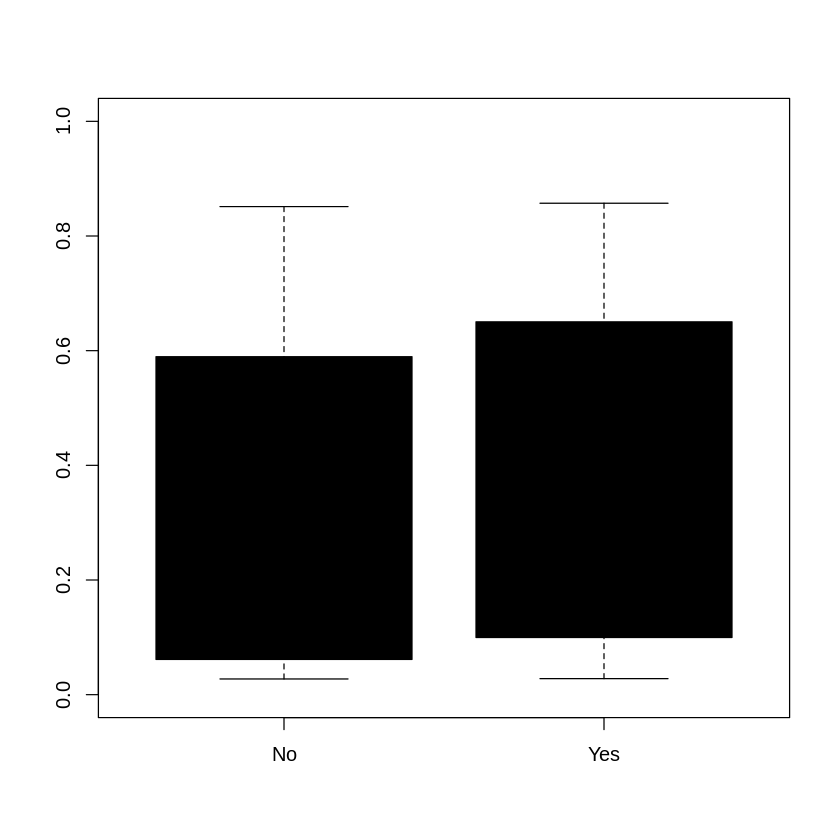

In [80]:
plot(x=age_data_2$Var1, y=age_data_2$mortality, ylim=c(0,1), col=age_data_2$Var3)

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (8): size

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.

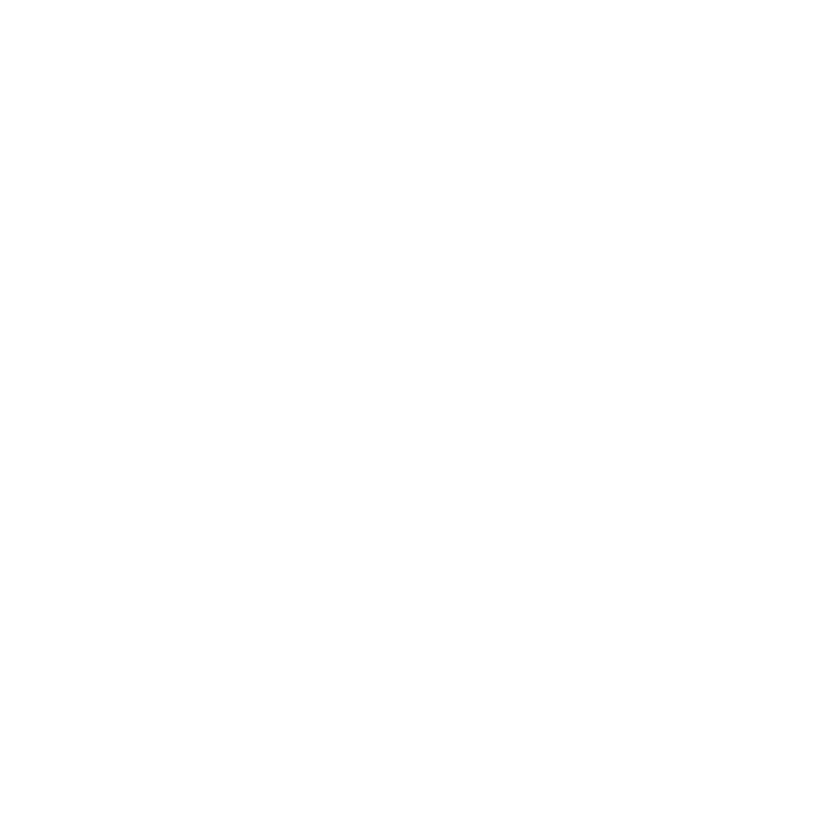

In [81]:
library(ggplot2)
ggplot(age_data_2,aes(x=Var1,y=Var3))+geom_point(alpha=.3,size=3+theme_bw())

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [3]:
raw_data = pd.read_csv(data_url)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

Dans le format CSV les dates ont 2 formats : MM/JJ/AAAA du 01 au 12 du mois et (M)M/JJ/AA du 13 à la fin du mois. Mais ça ne semble pas poser de problème à Python car le format est homogène ici (M)M/(J)J/AA.

On 

In [17]:
str(raw_data)

'                                   Province/State          Country/Region  \\\n0                                             NaN             Afghanistan   \n1                                             NaN                 Albania   \n2                                             NaN                 Algeria   \n3                                             NaN                 Andorra   \n4                                             NaN                  Angola   \n5                                             NaN              Antarctica   \n6                                             NaN     Antigua and Barbuda   \n7                                             NaN               Argentina   \n8                                             NaN                 Armenia   \n9                    Australian Capital Territory               Australia   \n10                                New South Wales               Australia   \n11                             Northern Territory             

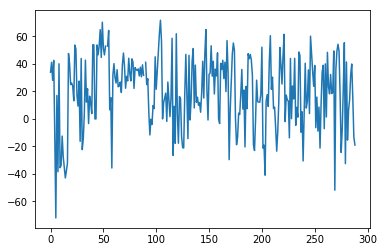

In [14]:
plot(x=raw_data$)